In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [0]:
df=pd.read_csv('iris.csv')

In [0]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
# create an object of standard sclaer
scaled_features = StandardScaler()
# We are dropping the target label since the scaling is done to independent features
scaled_features.fit(df.drop('species', axis = 1)) 
# Now perform the data transformation to sclae the deatures
scaled_features = scaled_features.transform(df.drop('species', axis = 1))

In [0]:
#put your code here and see for the best K what will be the classification report

In [0]:
df_std=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_std.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features, df['species'], test_size=0.3)

In [0]:
from sklearn.neighbors import KNeighborsClassifier 

In [0]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [0]:
knn.fit(X_train, Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [0]:
pred = knn.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(Y_test, pred)) 

[[12  0  0]
 [ 0 16  1]
 [ 0  3 13]]


In [0]:
print(classification_report(Y_test, pred)) 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.84      0.94      0.89        17
   virginica       0.93      0.81      0.87        16

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45



In [0]:
# choosing the right K value 
error_rate = [] 
  
# Will take some time 
for i in range(1, 40): 
      
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(X_train, Y_train) 
    pred_i = knn.predict(X_test) 
    error_rate.append(np.mean(pred_i != Y_test)) 

In [0]:
# choosing the right K value 
error_rate = [] 
  
# Will take some time 
for i in range(1, 40): 
      
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(X_train, Y_train) 
    pred_i = knn.predict(X_test) 
    error_rate.append(np.mean(pred_i != Y_test)) 

Text(0, 0.5, 'Error Rate')

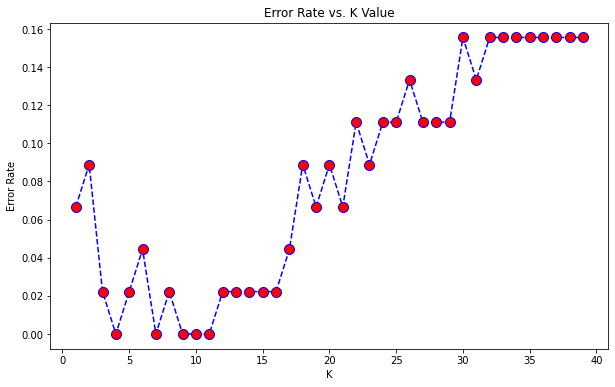

In [0]:
plt.figure(figsize =(10, 6)) 
plt.plot(range(1, 40), error_rate, color ='blue', 
                linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
  
plt.title('Error Rate vs. K Value') 
plt.xlabel('K') 
plt.ylabel('Error Rate') 